In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
import scipy
from scipy import stats

- LIMIT_BAL:  размер кредитного лимита (в том числе и на семью клиента)

- SEX: пол клиента (1 = мужской, 2 = женский )

- EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).

- MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных). 

- AGE: возраст в годах

- PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)

- BILL_AMT1 - BILL_AMT6:  задолженность,  BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь 

- PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре 

- default - индикатор невозврата денежных средств

In [16]:
data = pd.read_csv('credit_card_default_analysis.csv')

In [17]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Задание 1

Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы:

a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки

b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

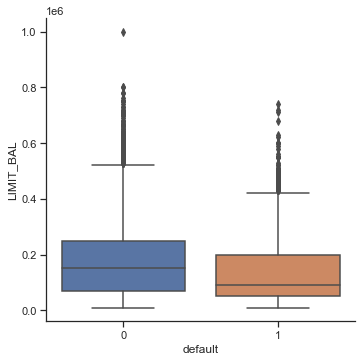

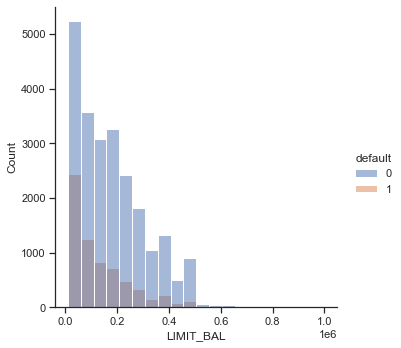

In [45]:
sns.catplot(x = 'default', y = 'LIMIT_BAL', kind = 'box', data = data)
sns.displot(data, x = 'LIMIT_BAL', hue = 'default', bins = 20)

Из графиков нетрудно подметить, что визуально кредитный лимит для тех людей, кто вернул кредит, значительно больше. В особенности это видно по графику boxplot, где изображены медианы двух рассматриваемых выборок.

а) Будем проверять гипотезу о равенстве медианных значений кредитного лимита с помощью доверительных интервалов на основе **bootstrap**.

In [55]:
# Функция, производящая n_samples выборок с возвращением объема len(data)
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [56]:
# Функция, возвращающая границы доверительного интервала, которая использует квантили порядков alpha/2 и 1 - alpha/2
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2, 100 * (1 - alpha / 2)])
    return boundaries

In [57]:
lim_def = data[data.default == 1].LIMIT_BAL.values
lim_ndef = data[data.default == 0].LIMIT_BAL.values

In [58]:
lim_def_scores = list(map(np.median, get_bootstrap_samples(lim_def, 1000)))
lim_ndef_scores = list(map(np.median, get_bootstrap_samples(lim_ndef, 1000)))

In [59]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(lim_def_scores, lim_ndef_scores)))

In [60]:
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [60000. 70000.]


**Интервальная оценка на основе bootstrap дает результат, который однозначно говорит о том, что медианные значения выборок не равны.**

б) Будем проверять гипотезу о равенстве распределений с помощью **перестановочного критерия для независимых выборок**.

In [61]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [62]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [63]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

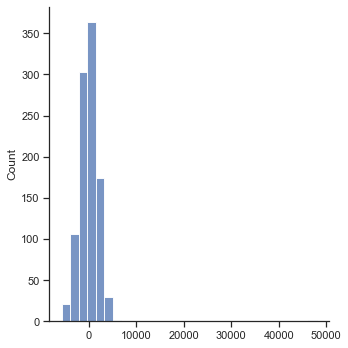

In [71]:
sns.displot(permutation_zero_dist_ind(lim_ndef, lim_def, max_combinations = 1000), bins = 30)

In [72]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

$H_0:$ распределения размера кредитного лимита в двух группах людей - вернувших и не вернувших кредит - совпадают (равны)

$H_1:$ не совпадают (двусторонняя альтернатива)

In [73]:
print("p-value: %f" % permutation_test(lim_ndef, lim_def, max_permutations = 10000))

p-value: 0.000100


**Достигаемый уровень значимости $1 \times 10^{-4}$, поэтому нулевая гипотеза $H_0$ уверенно отвергается на уровне значимости 0,05.**

**Более того, размер эффекта, который является разностью медианных значений выборок, существенен. Его практическая значимость также высока.**

## Задание 2

Пол (SEX): Проверьте гипотезу о том,  что гендерный состав  группы людей, вернувших и не вернувших кредит, отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия).

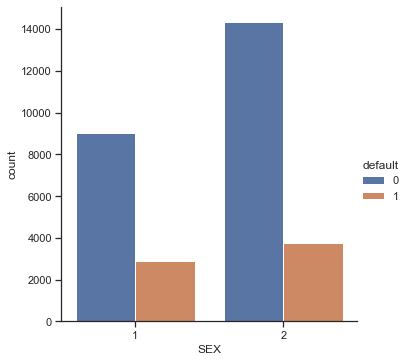

In [79]:
sns.catplot(x = 'SEX', kind = 'count', hue = 'default', data = data)

Проанализировав диаграмму, можно понять, например, что женщины берут кредиты чаще, чем мужчины.

Поскольку выборки людей, вернувших и не вернувших кредиты, независимы, то воспользуемся доверительным интервалом и $Z$-критерием для разности долей независимых выборок.

а) **Доверительный интервал** для разности долей (независимые выборки):

$$ \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}} $$

In [80]:
# Функция получает на вход две выборки и уровень значимости, возвращает границы доверительного интервала
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2)
    
    p1 = sum(sample1) / len(sample1)
    p2 = sum(sample2) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    
    return (left_boundary, right_boundary)

In [82]:
sex_def = data[data.default == 1].SEX.values
sex_ndef = data[data.default == 0].SEX.values

In [88]:
sex_def = np.where(sex_def == 2, 0, 1)
sex_ndef = np.where(sex_ndef == 2, 0, 1)

In [95]:
boundaries = proportions_diff_confint_ind(sex_def, sex_ndef, alpha = 0.05)

In [96]:
print("95%% confidence interval for the difference between proportions: [%f, %f]" % boundaries)

95% confidence interval for the difference between proportions: [0.033635, 0.060548]


**Как мы видим, 0 в доверительный интервал не попадает, поэтому можно сказать, что гендерный состав группы людей, вернувших и не вернувших кредит, отличается.**

б) **$Z$-критерий** для разности долей (независимые выборки)

In [97]:
# Функция принимает на вход две выборки, возвращает значение Z-критерий для разности долей
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = sum(sample1) / n1
    p2 = sum(sample2) / n2 
    P = (p1 * n1 + p2 * n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1 / n1 + 1 / n2))

In [98]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

$H_0:$ гендерный состав группы людей, вернувших и не вернувших кредит, совпадает

$H_1:$ различается (двусторонняя альтернатива)

In [100]:
print("p-value:", proportions_diff_z_test(proportions_diff_z_stat_ind(sex_def, sex_ndef)))

p-value: 4.472866521609831e-12


**Достигаемый уровень значимости $4,5 \times 10^{-12}$, поэтому нулевая гипотеза $H_0$ уверенно отвергается на уровне значимости 0,05.**

**Однако практическую значимость этот результат имеет вряд ли, поскольку размер эффекта, равный разности долей мужчин в выборках, находится в интервале от 3% до 6%.**

## Задание 3

Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг.  Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы  разность между наблюдаемым и ожидаемым количеством человек.  Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ?  Наличие какого образования является наилучшим индикатором того, что человек  отдаст долг ? наоборт, не отдаст долг ?